In [1]:
## Bring in needed mods 
import pyvista as pv, pandas as pd, numpy as np
## Load in our functions from chrom viz 
import chromoviz as cv
## Bring in matplot lib 
from matplotlib import pyplot as plt
## Set the back end of the pyvista ftns
pv.set_jupyter_backend("static")

In [2]:
## Set the chromosome and binsize used to make 3D structures, and n points to evalue
coi      = 'chrX'
binsize  = 200_000

In [3]:
## Set load in lammps models/structures post running the 4DGBWorkflow
csvs = cv.sortglob(f'./LAMMPS/{coi}*.csv')

## Define ftn for setting title
def settitle(p):
    tmps = p.split('/')[-1].split('.csv')[0].split('_')
    return f'{tmps[0]} {tmps[-1].capitalize()}, {tmps[1]} {tmps[2]}'

## Set the tiltes, and print to screen 
titles = [settitle(p) for p in csvs]
titles

['chrX Control, 24 HPT',
 'chrX Treated, 24 HPT',
 'chrX Control, 48 HPT',
 'chrX Treated, 48 HPT']

In [4]:
## Load in centormere locations for T2T reference genome 
centromere_path = 'CHM13v2.0.centromeres.bed'
centromeres     = pd.read_csv(centromere_path,sep=' ',header=None,names=['Chrom','Left','Right'])

## Parse for this chromosome 
cents = centromeres[(centromeres.Chrom==coi)]

## Gather the start and end position, print the locations
c1_start, c1_end = cents.Left.min(),cents.Right.max()

## Set centromere coordinates as lists matching the size of the csvs
cen_starts = [c1_start] * len(csvs)
cen_ends   = [c1_end  ] * len(csvs) 

In [5]:
## Loadin the structures for plotting 
aligned_points, aligned_splines, genomic_coords = cv.load_fit_align_chromosomes(csvs,bin_size_bp=binsize,centromere = (c1_start,c1_end))

2025-12-13 12:02:56.697 (   1.708s) [           20AC6]      vtkTubeFilter.cxx:197   WARN| vtkTubeFilter (0x1688e4c70): Scalar range is zero!
2025-12-13 12:02:57.238 (   2.249s) [           20AC6]      vtkTubeFilter.cxx:197   WARN| vtkTubeFilter (0x1688e4c70): Scalar range is zero!
2025-12-13 12:02:57.396 (   2.406s) [           20AC6]      vtkTubeFilter.cxx:197   WARN| vtkTubeFilter (0x1688e4c70): Scalar range is zero!
2025-12-13 12:02:57.937 (   2.947s) [           20AC6]      vtkTubeFilter.cxx:197   WARN| vtkTubeFilter (0x10735d730): Scalar range is zero!
2025-12-13 12:02:58.107 (   3.117s) [           20AC6]      vtkTubeFilter.cxx:197   WARN| vtkTubeFilter (0x179dbf6e0): Scalar range is zero!
2025-12-13 12:02:58.649 (   3.660s) [           20AC6]      vtkTubeFilter.cxx:197   WARN| vtkTubeFilter (0x179dbf6e0): Scalar range is zero!
2025-12-13 12:02:58.822 (   3.832s) [           20AC6]      vtkTubeFilter.cxx:197   WARN| vtkTubeFilter (0x179dbf6e0): Scalar range is zero!
2025-12-13 12

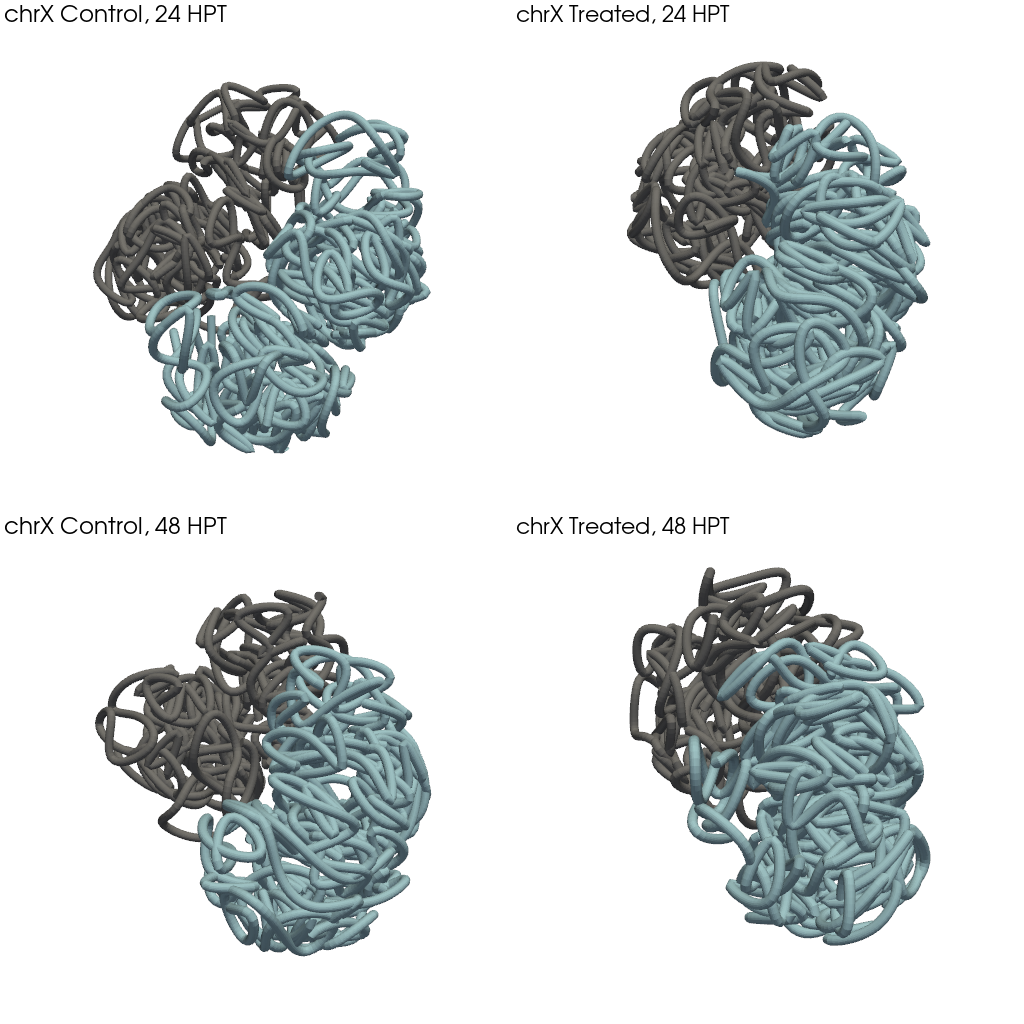

In [6]:
## Set output save path
out_save_path = f'Figure.6_HDACi.timecourse_{coi}.png',

## Plot the chromosomes, this should regenerate the Figure 6 from Rogers et al. 
cv.plot_chromosomes_centromere_grid(models_points=aligned_points,       ## Pass aligned points
                                    models_splines=aligned_splines,     ## Pass aligned splines
                                    genomics=genomic_coords,            ## Give the genomic coordinate vector 
                                    cen_starts=cen_starts,              ## Pass the centromere, left start genomic position 
                                    cen_ends=cen_ends,                  ## Pass the centromere, right end genomic position 
                                    tube_radius=0.1,                    ## Set the readius of the spline tubes, zoom, and view angle 
                                    zoom=1.25,
                                    view_vector=(1,0,1.5),
                                    q_color='lightblue',                ## Set the q-arm color 
                                    p_color='grey',                     ## Set the p-arm color 
                                    background_color='w',               ## Set background color
                                    titles=titles,                      ## Pass the titles of the structures 
                                    show_centromere=False,              ## Hide centromere segments 
                                    save_path=out_save_path)            ## Pass output path to save png